## Load the packages

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

## Import the data

In [153]:
# paths for the three dfs

df_jan_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\yellow_tripdata_2016-01.csv"
df_feb_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\yellow_tripdata_2016-02.csv"
df_mar_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\yellow_tripdata_2016-03.csv"

# load the dataframes


df_jan = dd.read_csv(df_jan_path, assume_missing=True, usecols= ['trip_distance', 'tpep_pickup_datetime', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'], parse_dates=["tpep_pickup_datetime"])

df_feb = dd.read_csv(df_feb_path, assume_missing=True, usecols= ['trip_distance', 'tpep_pickup_datetime', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'], parse_dates=["tpep_pickup_datetime"])


df_mar = dd.read_csv(df_mar_path, assume_missing=True, usecols= ['trip_distance', 'tpep_pickup_datetime', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'], parse_dates=["tpep_pickup_datetime"])

In [154]:
df_jan

,tpep_pickup_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=26,,,,,,,
,datetime64[ns],float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...
,...,...,...,...,...,...,...


In [155]:
# concat the three dataframes as one

df_final = dd.concat([df_jan, df_feb, df_mar], axis=0)

## New York bounding box:

- min_latitude = 40.60
- max_latitude = 40.85
- min_longitude = -74.05
- max_longitude = -73.70

In [156]:
# set the values of coordinates

min_latitude = 40.60
max_latitude = 40.85

min_longitude = -74.05
max_longitude = -73.70

min_fare_amount_val = 0.50
max_fare_amount_val = 81.0

min_trip_distance_val = 0.25
max_trip_distance_val = 24.43

In [157]:
# select data points within the given ranges

df_final = df_final.loc[(df_final["pickup_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
(df_final["pickup_longitude"].between(min_longitude, max_longitude, inclusive="both")) & 
(df_final["dropoff_latitude"].between(min_latitude, max_latitude, inclusive="both")) & 
(df_final["dropoff_longitude"].between(min_longitude, max_longitude, inclusive="both")), :]

In [158]:
# select data points within the given ranges

df_final = df_final.loc[(df_final["fare_amount"].between(min_fare_amount_val,max_fare_amount_val,inclusive="both")) & 
(df_final["trip_distance"].between(min_trip_distance_val,max_trip_distance_val,inclusive="both"))]

In [159]:

# drop columns from the data

df_final = df_final.drop(columns=['trip_distance', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount'])

In [160]:

df_final

,tpep_pickup_datetime,pickup_longitude,pickup_latitude
npartitions=82,,,
,datetime64[ns],float64,float64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [161]:

df_final = df_final.compute()

In [162]:

# save the dataframe

save_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\processing_data.csv"

df_final.to_csv(save_path, index=False)


In [163]:

from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

In [164]:
data_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\processing_data.csv"

In [165]:
df_reader = pd.read_csv(data_path, chunksize=100000, usecols=["pickup_latitude","pickup_longitude"])

## Train a StandardScaler on the Data

In [166]:
# Train StandardScaler

#  StandardScaler normalizes the data so that all values have a mean of 0 and a standard deviation of 1.

scaler = StandardScaler()

for chunk in df_reader:
    # fit the scaler
    scaler.partial_fit(chunk)


"""Since the dataset is large, partial_fit() is used to incrementally compute the mean and standard deviation across chunks without loading the entire dataset into memory."""

In [167]:
scaler

StandardScaler()

## Train the MiniBatchKMeans Clustering Model

In [168]:
df_reader = pd.read_csv(data_path, chunksize=100000, usecols=['pickup_latitude','pickup_longitude'])

In [169]:
# train the model

mini_batch = MiniBatchKMeans(n_clusters=30, n_init=10, random_state=42)

for chunk in df_reader:
    # data is scaled using the previously trained StandardScaler.
    scaled_chunk = scaler.transform(chunk)
    # Train model incrementally
    mini_batch.partial_fit(scaled_chunk)

In [170]:
mini_batch

MiniBatchKMeans(n_clusters=30, n_init=10, random_state=42)

## Cluster Centroids and Inverse Transform

In [171]:
# centroids of the model

mini_batch.cluster_centers_

array([[ 0.6614905 ,  1.94149572],
       [-0.07596928, -0.13980742],
       [ 1.44528196, -1.99721801],
       [ 5.15118517, -3.83635934],
       [-0.81227839, -1.16343866],
       [-0.13488625,  0.42137614],
       [ 2.8610836 ,  0.72209007],
       [-0.39015448, -0.52924948],
       [ 0.56520318,  1.07003845],
       [-0.3303071 , -2.24451716],
       [-0.4036074 , -1.00166487],
       [-0.10175947,  1.16185672],
       [-0.55920139, -0.08902033],
       [ 1.59046972,  0.31820801],
       [-0.25372558, -0.04552948],
       [-0.35389222,  0.20846098],
       [ 0.52314378, -1.31780812],
       [ 0.81932304,  2.79102906],
       [ 0.12935608,  0.28712745],
       [-0.27639436,  0.73099844],
       [-1.0082658 , -1.53772972],
       [ 0.39844824,  0.67692302],
       [-0.74701446, -0.76412025],
       [ 0.1378545 ,  1.62394033],
       [-0.43385234, -3.07963657],
       [-0.54018812,  0.3506753 ],
       [-0.17842182, -0.57100818],
       [-0.76072368, -0.38830582],
       [ 0.4240573 ,

In [172]:
scaler.inverse_transform(mini_batch.cluster_centers_)

array([[-73.94975046,  40.80392392],
       [-73.97685385,  40.74726528],
       [-73.92094427,  40.69670159],
       [-73.78474354,  40.64663525],
       [-74.00391496,  40.7193993 ],
       [-73.97901919,  40.7625422 ],
       [-73.8689102 ,  40.77072843],
       [-73.9884009 ,  40.73666362],
       [-73.95328925,  40.78020052],
       [-73.98620137,  40.68996945],
       [-73.98889533,  40.72380321],
       [-73.9778017 ,  40.78270006],
       [-73.99461378,  40.74864784],
       [-73.91560827,  40.75973368],
       [-73.98338682,  40.74983178],
       [-73.98706818,  40.75674608],
       [-73.95483503,  40.71519695],
       [-73.94394974,  40.82705049],
       [-73.96930766,  40.75888759],
       [-73.98421995,  40.77097094],
       [-74.01111796,  40.70921009],
       [-73.95941789,  40.76949887],
       [-74.00151635,  40.73026981],
       [-73.96899532,  40.79527921],
       [-73.9900069 ,  40.66723527],
       [-73.993915  ,  40.76061753],
       [-73.98061923,  40.73552684],
 

## Prepare New Data for Clustering

In [173]:
# perform predictions and assign cluster

location_subset = df_final[df_final.columns[1:]]

location_subset

,pickup_longitude,pickup_latitude
0,-73.990372,40.734695
1,-73.980782,40.729912
2,-73.984550,40.679565
3,-73.993469,40.718990
4,-73.960625,40.781330
...,...,...
420269,-73.790565,40.644451
420270,-73.788055,40.641483
420271,-73.789154,40.646736
420273,-73.977356,40.774471


In [174]:
# scale the input data

scaled_location_subset = scaler.transform(location_subset)

scaled_location_subset

array([[-0.44377822, -0.60154915],
       [-0.18283861, -0.77727142],
       [-0.28538767, -2.62669931],
       ...,
       [ 5.03117896, -3.83265296],
       [-0.08963107,  0.85958016],
       [ 4.77729738, -3.89290861]])

## Predict Clusters for New Data

In [175]:
# get the cluster predictions

cluster_predictions = mini_batch.predict(scaled_location_subset)

cluster_predictions.shape

(33234199,)

- mini_batch.predict() assigns each row in scaled_location_subset to one of the 30 clusters.

## Save the Cluster Assignments

In [176]:
# save the cluster prediction in data

df_final['region'] = cluster_predictions

df_final

,tpep_pickup_datetime,pickup_longitude,pickup_latitude,region
0,2016-01-01 00:00:00,-73.990372,40.734695,7
1,2016-01-01 00:00:00,-73.980782,40.729912,26
2,2016-01-01 00:00:00,-73.984550,40.679565,9
3,2016-01-01 00:00:00,-73.993469,40.718990,10
4,2016-01-01 00:00:00,-73.960625,40.781330,8
...,...,...,...,...
420269,2016-03-31 21:43:11,-73.790565,40.644451,3
420270,2016-03-20 08:45:16,-73.788055,40.641483,3
420271,2016-03-20 08:59:21,-73.789154,40.646736,3
420273,2016-03-26 03:02:32,-73.977356,40.774471,19


In [177]:
# drop the latitude and logitude columns from data

time_series_data = df_final.drop(columns=["pickup_longitude", "pickup_latitude"])
time_series_data 

,tpep_pickup_datetime,region
0,2016-01-01 00:00:00,7
1,2016-01-01 00:00:00,26
2,2016-01-01 00:00:00,9
3,2016-01-01 00:00:00,10
4,2016-01-01 00:00:00,8
...,...,...
420269,2016-03-31 21:43:11,3
420270,2016-03-20 08:45:16,3
420271,2016-03-20 08:59:21,3
420273,2016-03-26 03:02:32,19


In [178]:
# save the time series data

save_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\time_series.csv"

time_series_data.to_csv(save_path, index=False)

In [179]:
time_series_data.dtypes

tpep_pickup_datetime    datetime64[ns]
region                           int32
dtype: object

In [180]:
# set the time series as the index

time_series_data.set_index('tpep_pickup_datetime', inplace=True)

time_series_data

,region
tpep_pickup_datetime,
2016-01-01 00:00:00,7
2016-01-01 00:00:00,26
2016-01-01 00:00:00,9
2016-01-01 00:00:00,10
2016-01-01 00:00:00,8
...,...
2016-03-31 21:43:11,3
2016-03-20 08:45:16,3
2016-03-20 08:59:21,3


In [181]:
# group the time series data based on regions

region_grp = time_series_data.groupby('region')

region_grp

In [182]:

# check for missing values

time_series_data.isna().sum()

region    0
dtype: int64

In [183]:
# resample the time series in 15 minute intervals

resampled_data = (
    region_grp['region']
    .resample("15min")    #  groups the data into 15-minute intervals.
    .count()              #  counts the number of rows in each 15-minute interval.
)

resampled_data

region  tpep_pickup_datetime
0       2016-01-01 00:00:00      58
        2016-01-01 00:15:00     120
        2016-01-01 00:30:00     149
        2016-01-01 00:45:00     160
        2016-01-01 01:00:00     187
                               ... 
29      2016-03-31 22:45:00      14
        2016-03-31 23:00:00      17
        2016-03-31 23:15:00      18
        2016-03-31 23:30:00      13
        2016-03-31 23:45:00      14
Name: region, Length: 262080, dtype: int64

In [194]:
resampled_data.name = "total_pickups"

In [195]:
resampled_data = resampled_data.reset_index(level=0)

resampled_data

,region,total_pickups
tpep_pickup_datetime,,
2016-01-01 00:00:00,0,58
2016-01-01 00:15:00,0,120
2016-01-01 00:30:00,0,149
2016-01-01 00:45:00,0,160
2016-01-01 01:00:00,0,187
...,...,...
2016-03-31 22:45:00,29,14
2016-03-31 23:00:00,29,17
2016-03-31 23:15:00,29,18


In [197]:
# zeros in the data

(resampled_data['total_pickups'] == 0).sum()

3668

In [199]:
# replaces all zero values in the 'total_pickups' column with epsilon_val

epsilon_val = 10

resampled_data.replace({'total_pickups': {0 : epsilon_val}}, inplace=True)

***Why Replace Zeros?***

- ✅ Avoid Issues with Log Transformations

     - If you apply log(total_pickups), log(0) is undefined.
     - Replacing 0 prevents errors in log-based scaling.
- ✅ Prevent Model Bias

     - Some ML models (like DecisionTree or KMeans) might misinterpret 0 as missing or special.
- ✅ Avoid Division by Zero

In [202]:
(resampled_data['total_pickups'] == 0).sum()

0

# Smoothening


## Moving Average

In [206]:
from sklearn.metrics import mean_absolute_percentage_error

In [207]:
window_values = list(range(3,11,1))
window_values

[3, 4, 5, 6, 7, 8, 9, 10]

**Generalizing Window Sizes**
- If the window size = 7, 8, 9, 10, it means we compute the moving average over that many previous values.

    - ***Larger windows*** → Smoother trends, but  less responsive to recent changes.
    - ***Smaller windows*** → More responsive to changes, but more noise.

In [208]:
# evaluates different moving average window sizes for time series forecasting.


def calculate_best_window_value(windows):
    for window in windows:
        ind = window - 1
        # .rolling(window=window).mean() computes a moving average over total_pickups with the given window size.
        y_pred = resampled_data['total_pickups'].rolling(window=window).mean().values[ind:]
        # y holds the actual total_pickups values, excluding the first window - 1 values
        y = resampled_data['total_pickups'].values[ind:]
        error = mean_absolute_percentage_error(y, y_pred)
        print(f"For window value {window}, the MAPE is {error:.2f}")

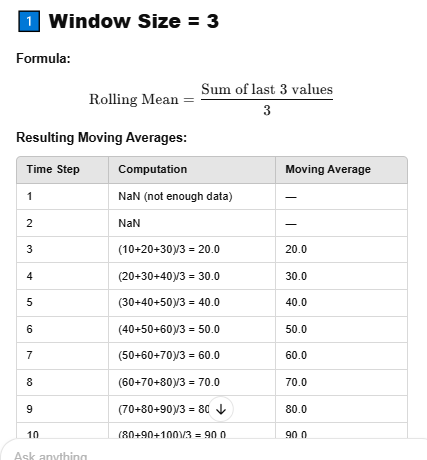

In [219]:
from IPython.display import Image

# Display image from the local file system
Image(filename=r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data/Window_size_rolling_mean_3.png")

Lower MAPE = Better Accuracy.


🔍 **Choosing the Best Window**
   - Short-term trends? → Use a small window (e.g., 3-5).
   - Long-term trends? → Use a larger window (e.g., 7-10).
   - Find the best window? → Use MAPE (Mean Absolute Percentage Error) to evaluate different window sizes.


In [209]:

calculate_best_window_value(window_values)

For window value 3, the MAPE is 0.20
For window value 4, the MAPE is 0.24
For window value 5, the MAPE is 0.28
For window value 6, the MAPE is 0.31
For window value 7, the MAPE is 0.35
For window value 8, the MAPE is 0.39
For window value 9, the MAPE is 0.42
For window value 10, the MAPE is 0.46


## EWMA

EWMA smooths time-series data by giving more weight to recent values while gradually decreasing the weight of older values

- ***High α (0.9)*** → Recent values have very high weight
- ***Low α (e.g., 0.1)*** → Older values still influence the average significantly

**Mathematical Formula for EWMA**
- The formula for EWMA at time 
𝑡
t is:


S 
t
​
 =α⋅X 
t
​
 +(1−α)⋅S 
t−1
​



**Smoothing Factor (α) in Exponentially Weighted Moving Average**

   - α = ( 2 / (N + 1))
   
   where N is window size

In [212]:

resampled_data['total_pickups'].ewm(alpha=0.9).mean()

tpep_pickup_datetime
2016-01-01 00:00:00     58.000000
2016-01-01 00:15:00    114.363636
2016-01-01 00:30:00    145.567568
2016-01-01 00:45:00    158.558056
2016-01-01 01:00:00    184.156062
                          ...    
2016-03-31 22:45:00     14.720768
2016-03-31 23:00:00     16.772077
2016-03-31 23:15:00     17.877208
2016-03-31 23:30:00     13.487721
2016-03-31 23:45:00     13.948772
Name: total_pickups, Length: 262080, dtype: float64

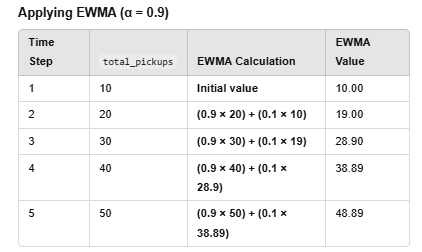

In [220]:
from IPython.display import Image

# Display image from the local file system
Image(filename=r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data/Applying_EWMA_alpha_0.9.png")

In [213]:

smoothing_values = np.arange(0.2,1,0.1)
smoothing_values

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [221]:
def calculate_best_smoothing_value(values):
    y = resampled_data['total_pickups'].values
    for value in values:
        y_pred = resampled_data['total_pickups'].ewm(alpha=value).mean()
        error = mean_absolute_percentage_error(y, y_pred)
        print(f"For smoothing value {value:.1f}, the MAPE is {error:.2f}")

In [222]:

calculate_best_smoothing_value(smoothing_values)

For smoothing value 0.2, the MAPE is 0.41
For smoothing value 0.3, the MAPE is 0.27
For smoothing value 0.4, the MAPE is 0.20
For smoothing value 0.5, the MAPE is 0.16
For smoothing value 0.6, the MAPE is 0.12
For smoothing value 0.7, the MAPE is 0.09
For smoothing value 0.8, the MAPE is 0.06
For smoothing value 0.9, the MAPE is 0.03


## Why we are taking alpha 0.4

Within 1 hour of window of total pickup splitting with 15 min window frame

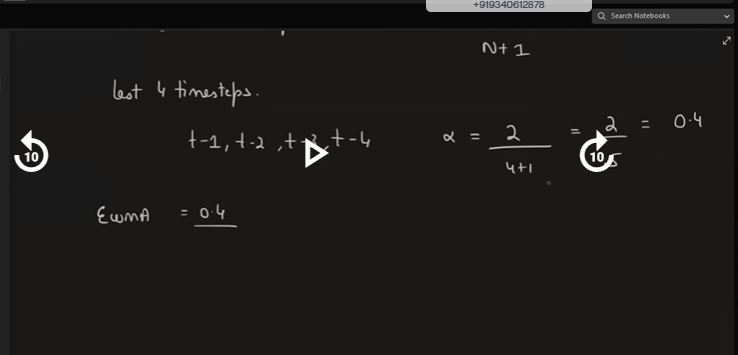

In [233]:
from IPython.display import Image

# Display image from the local file system
Image(filename=r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data/Why_alpha_0.4.png")

In [231]:
# dataset with pickup smoothing applied

resampled_data["avg_pickups"] = resampled_data['total_pickups'].ewm(alpha=0.4).mean().round()

resampled_data

,region,total_pickups,avg_pickups
tpep_pickup_datetime,,,
2016-01-01 00:00:00,0,58,58.0
2016-01-01 00:15:00,0,120,97.0
2016-01-01 00:30:00,0,149,123.0
2016-01-01 00:45:00,0,160,140.0
2016-01-01 01:00:00,0,187,161.0
...,...,...,...
2016-03-31 22:45:00,29,14,16.0
2016-03-31 23:00:00,29,17,16.0
2016-03-31 23:15:00,29,18,17.0


In [224]:
# save the resampled data

resampled_data_save_path = r"D:\Uber Demand Prediction\Session 4 - Creating Historical Data\final_data.csv"

resampled_data.to_csv(resampled_data_save_path, index=True)

In [225]:
# shape of the data

resampled_data.shape

(262080, 3)